<a href="https://colab.research.google.com/github/jhj030722/jhj030722/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0️⃣ 데이터 확인

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DArt-B/5. 2024_1/train.csv')

In [ ]:
df_t = pd.read_csv('/content/drive/MyDrive/DArt-B/5. 2024_1/test.csv')

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### 결측치 처리

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: >

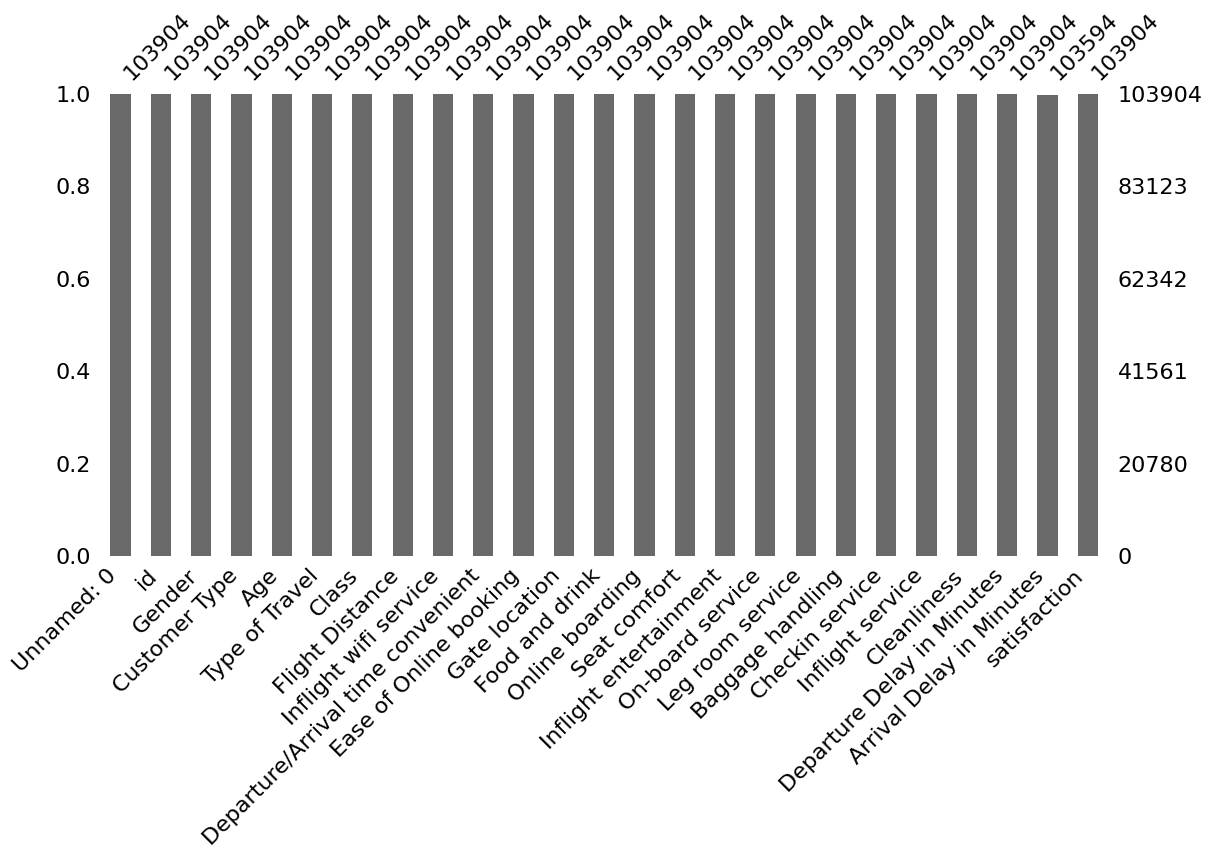

In [ ]:
import missingno as msno

msno.bar(df = df, figsize = (13,6))

- 세부 서비스 만족도의 점수가 0인 경우, 결측치 처리

In [ ]:
df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness']] = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                                              'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
                                              'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].replace(0, np.nan)

In [ ]:
print(df.isnull().sum())

Unnamed: 0                              0
id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes          

- 결측치를 drop한 데이터프레임 생성
- Drop의 이유 : 결측치를 제거해도 약 10만개의 데이터가 남음.

In [ ]:
drop_df = df.dropna()

In [ ]:
print(drop_df.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


### 히트맵을 위한 binary 생성

In [ ]:
drop_df['satisfaction_binary'] = np.where(drop_df['satisfaction'] == 'satisfied', 5, 1)

<ipython-input-11-1dd8efc9eab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df['satisfaction_binary'] = np.where(drop_df['satisfaction'] == 'satisfied', 5, 1)


In [ ]:
drop_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,...,4.0,3.0,4,4.0,5.0,5.0,25,18.0,neutral or dissatisfied,1
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,...,1.0,5.0,3,1.0,4.0,1.0,1,6.0,neutral or dissatisfied,1
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,...,4.0,3.0,4,4.0,4.0,5.0,0,0.0,satisfied,5
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,...,2.0,5.0,3,1.0,4.0,2.0,11,9.0,neutral or dissatisfied,1
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,...,3.0,4.0,4,3.0,3.0,3.0,0,0.0,satisfied,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2.0,1.0,...,3.0,1.0,4,2.0,3.0,2.0,3,0.0,neutral or dissatisfied,1
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4.0,4.0,...,5.0,5.0,5,5.0,5.0,4.0,0,0.0,satisfied,5
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1.0,1.0,...,3.0,2.0,4,5.0,5.0,4.0,7,14.0,neutral or dissatisfied,1
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1.0,1.0,...,4.0,5.0,1,5.0,4.0,1.0,0,0.0,neutral or dissatisfied,1


# 1️⃣ 문제정의

항공사에 대한 만족도가 satisfied보다 neutral or dissatisfied가 더 많다.

<ipython-input-18-6906b9081e01>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'satisfaction', data = drop_df, palette = "Blues")


<Axes: xlabel='satisfaction', ylabel='count'>

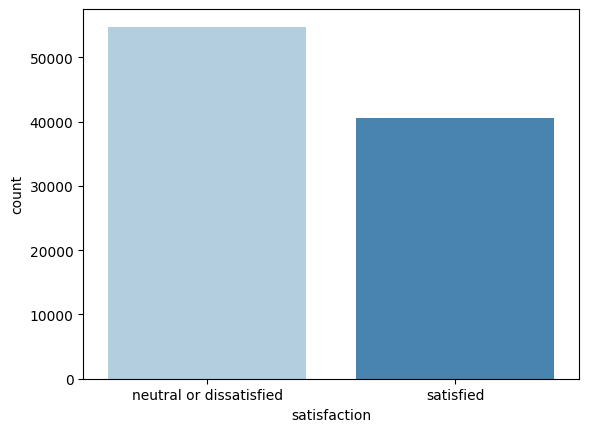

In [ ]:
sns.countplot(x = 'satisfaction', data = drop_df, palette = "Blues")

# 2️⃣ 지표결정

**승객관련 정보**

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

**서비스 관련지표**

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# 3️⃣ 현재상태 파악

## delay 시간

출발 지연시간과 도착 지연시간은 거의 일치함.


-> 출발이 늦어진 만큼 도착이 늦어지는 것은 당연하다.

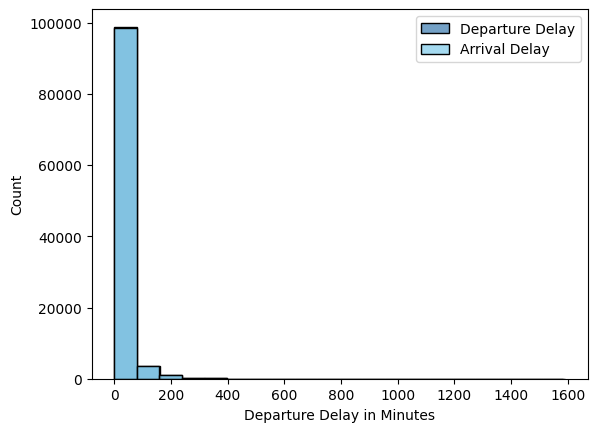

In [ ]:
sns.histplot(data=df, x="Departure Delay in Minutes", bins=20, color="steelblue", label="Departure Delay")
sns.histplot(data=df, x="Arrival Delay in Minutes", bins=20, color="skyblue", label="Arrival Delay")
plt.legend()
plt.show()

## 고객유형별 만족도

<Axes: xlabel='Gender', ylabel='count'>

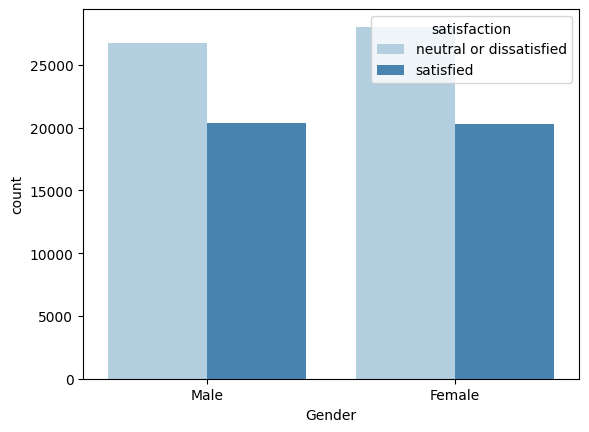

In [ ]:
sns.countplot(x = 'Gender', hue= 'satisfaction', data = drop_df, palette = "Blues")

###Insight 1 : 비즈니스 여행보다 개인 여행의 만족도가 더 낮음

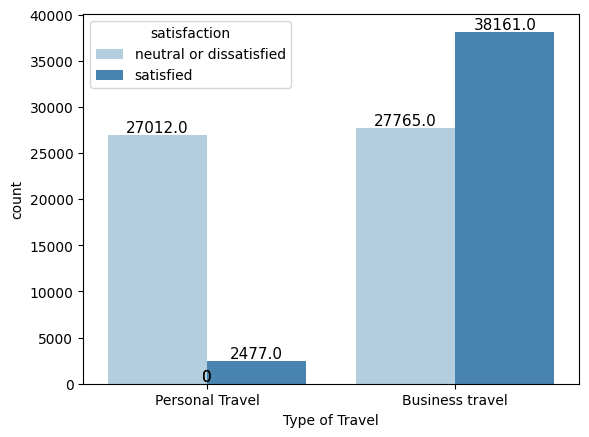

In [ ]:
ax = sns.countplot(x = 'Type of Travel', hue = 'satisfaction', palette = "Blues", data = drop_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Class와 연관성이 있음을 파악하였음.

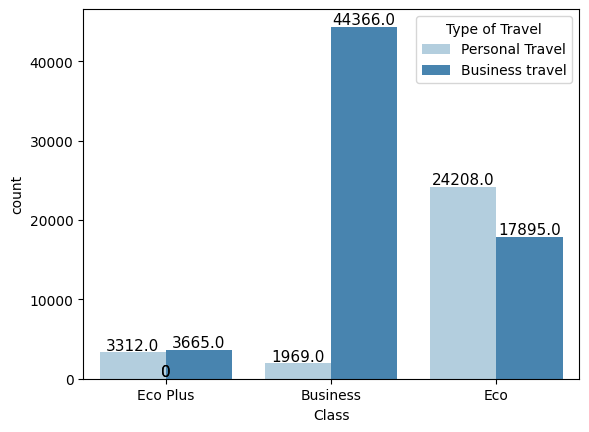

In [ ]:
ax = sns.countplot(x = 'Class', hue = 'Type of Travel', palette = "Blues", data = drop_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

### Insight 2 : 충성고객보다 비충성고객의 만족도가 더 낮음

<Axes: xlabel='Customer Type', ylabel='count'>

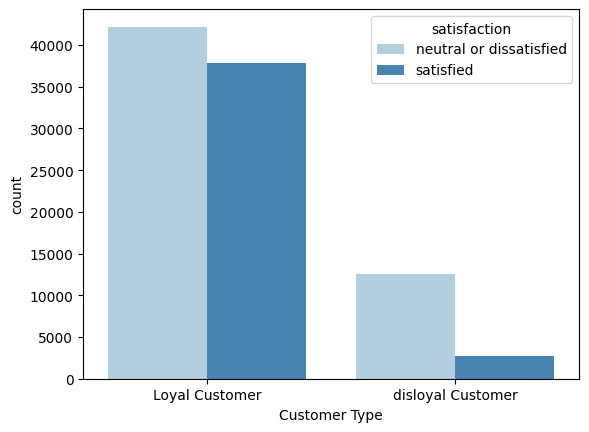

In [ ]:
# 충성고객과 비충성고객의 만족도
sns.countplot(x = 'Customer Type', hue= 'satisfaction', data = drop_df, palette = "Blues")

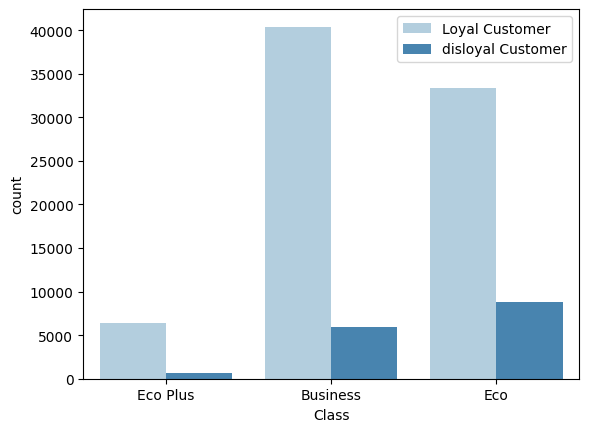

In [ ]:
sns.countplot(x = 'Class', hue= 'Customer Type', data = drop_df, palette = "Blues", )
plt.legend(loc='upper right')# 범례 삭제
plt.show()

### Insight 3: Eco와 Eco Plus에서 유독 만족도가 낮음

<Axes: xlabel='Class', ylabel='count'>

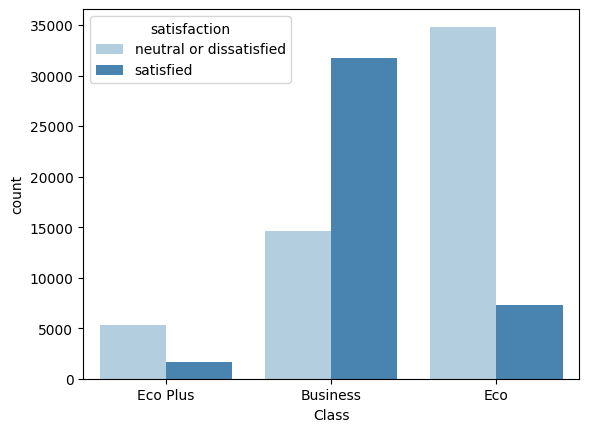

In [ ]:
# Class별 만족도 비교
sns.countplot(x = 'Class', hue = 'satisfaction', data = drop_df, palette = "Blues")

### Insight 4: 40-60대 사이의 만족도가 높은 경향성

수입이 높고, 출장이 많은 40-60대의 경우, 비즈니스 클래스를 주로 이용할 것으로 예상함.

-> Class와 연관성이 있음.

<Axes: xlabel='Age', ylabel='satisfaction_binary'>

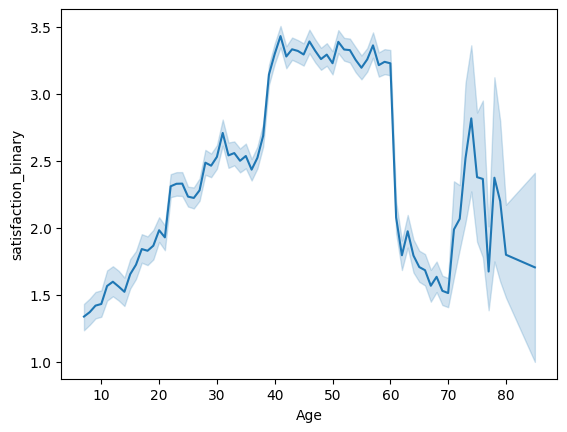

In [ ]:
sns.lineplot(x = 'Age', y='satisfaction_binary', data = drop_df)

<ipython-input-24-354862bee187>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Age', data = drop_df, palette = "Blues")


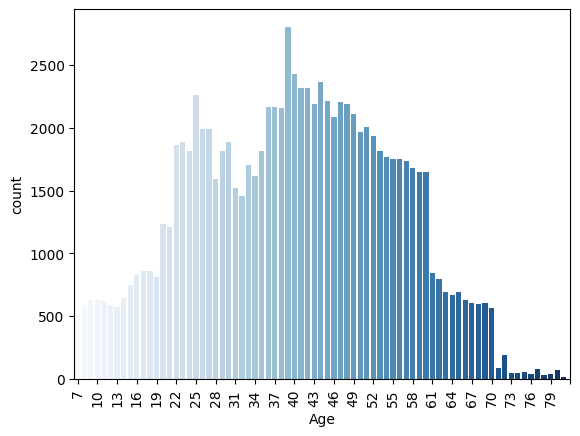

In [ ]:
sns.countplot(x = 'Age', data = drop_df, palette = "Blues")
plt.xticks(rotation=90)
plt.xticks(np.arange(0, 78, step=3))
plt.show()

70대 이상의 데이터 개수가 매우 작아, 이를 제외하고 그래프를 다시 출력

<Axes: xlabel='Age', ylabel='satisfaction_binary'>

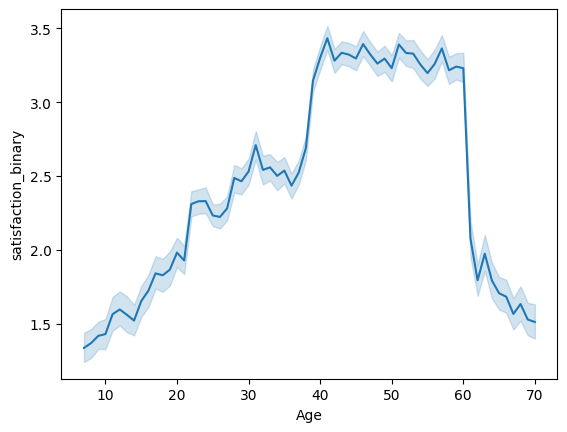

In [ ]:
sns.lineplot(x = 'Age', y='satisfaction_binary', data = drop_df[drop_df['Age'] <= 70])

<ipython-input-26-4f32e6db7850>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Class", y = "Age", palette = "Blues", data = drop_df, ax = ax[0])


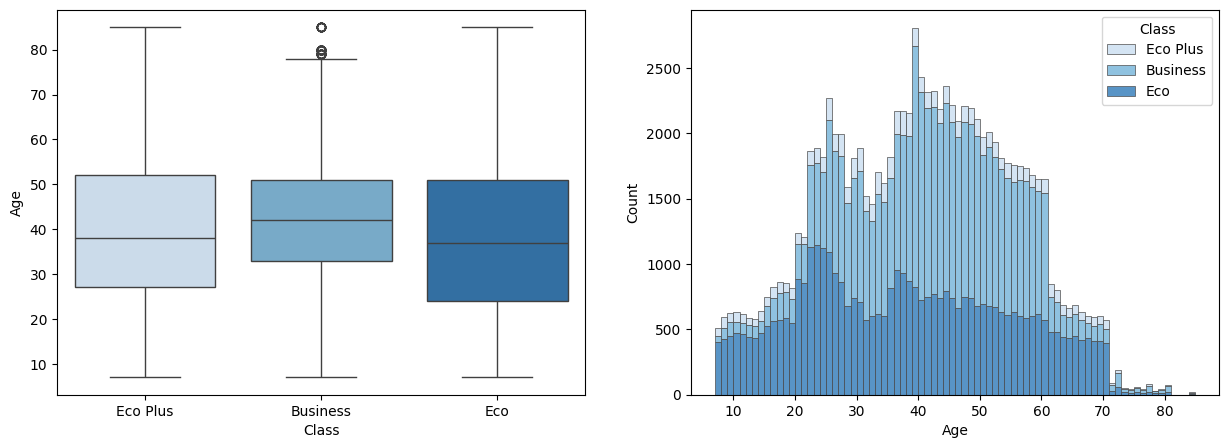

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(x = "Class", y = "Age", palette = "Blues", data = drop_df, ax = ax[0])
sns.histplot(drop_df, x = "Age", hue = "Class", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

pass

### Insight 5: 비행거리가 늘어날수록 만족도가 증가

비행 거리가 짧은 사람들은 Eco Class를 주로 이용하는 경향이 있는 것으로 확인.

-> 비행거리와 Class의 연관성 존재.

<ipython-input-27-34bea04e912b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df['Flight_Distance_Category'] = pd.cut(drop_df['Flight Distance'], bins=np.arange(0, 5001, 100), labels=np.arange(1, 51))


<Axes: xlabel='Flight_Distance_Category', ylabel='satisfaction_binary'>

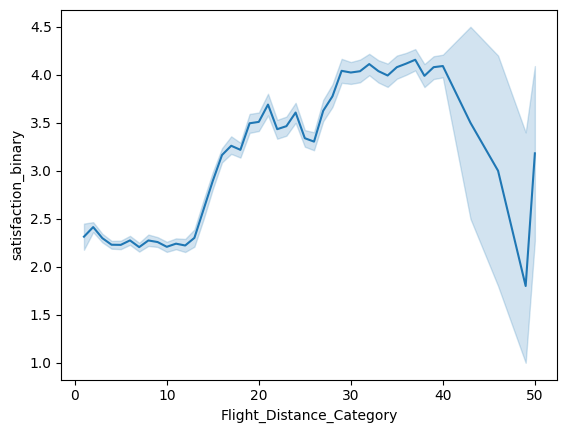

In [ ]:
drop_df['Flight_Distance_Category'] = pd.cut(drop_df['Flight Distance'], bins=np.arange(0, 5001, 100), labels=np.arange(1, 51))
sns.lineplot(x = 'Flight_Distance_Category', y='satisfaction_binary', data = drop_df)

In [ ]:
print(df[df['Flight Distance'] >= 4000].shape[0], '개')
print(f"{df[df['Flight Distance'] >= 4000].shape[0]/df['Flight Distance'].shape[0]*100:.2f}%")

69 개
0.07%


<ipython-input-29-2e65fe76a785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df['Flight_Distance_Category'] = pd.cut(drop_df['Flight Distance'], bins=np.arange(0, 4001, 100), labels=np.arange(1, 41))


<Axes: xlabel='Flight_Distance_Category', ylabel='satisfaction_binary'>

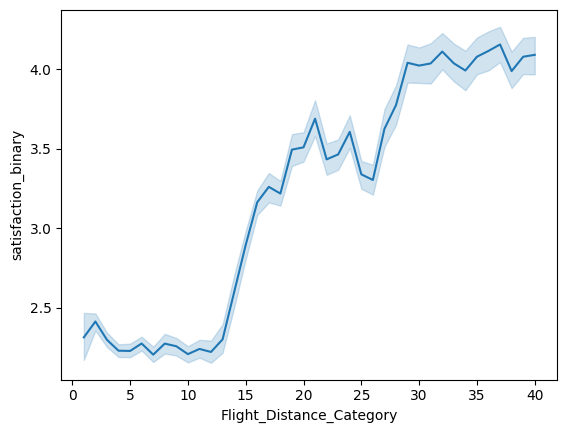

In [ ]:
drop_df['Flight_Distance_Category'] = pd.cut(drop_df['Flight Distance'], bins=np.arange(0, 4001, 100), labels=np.arange(1, 41))
sns.lineplot(x = 'Flight_Distance_Category', y='satisfaction_binary', data = drop_df)

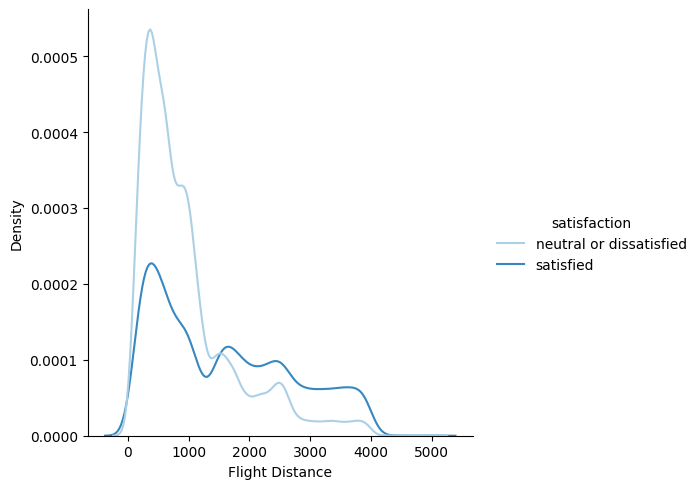

In [ ]:
 sns.displot(data=drop_df, x='Flight Distance', hue="satisfaction", kind="kde", palette = "Blues")

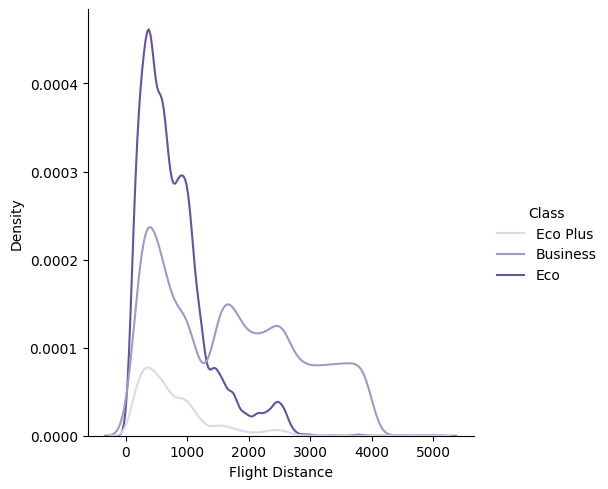

In [ ]:
sns.displot(data=drop_df, x='Flight Distance', hue="Class", kind="kde", palette = "Purples")

# 4️⃣ 평가

### Class별로 데이터 분리하여 시각화

In [ ]:
eco_df = drop_df[drop_df['Class'] == 'Eco']
ecoplus_df = drop_df[drop_df['Class'] == 'Eco Plus']
business_df = drop_df[drop_df['Class'] == 'Business']

In [ ]:
service_df = drop_df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']] = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]
service_cols = service_df.columns

<ipython-input-19-c3b0dae1e4bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_df = drop_df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']] = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]


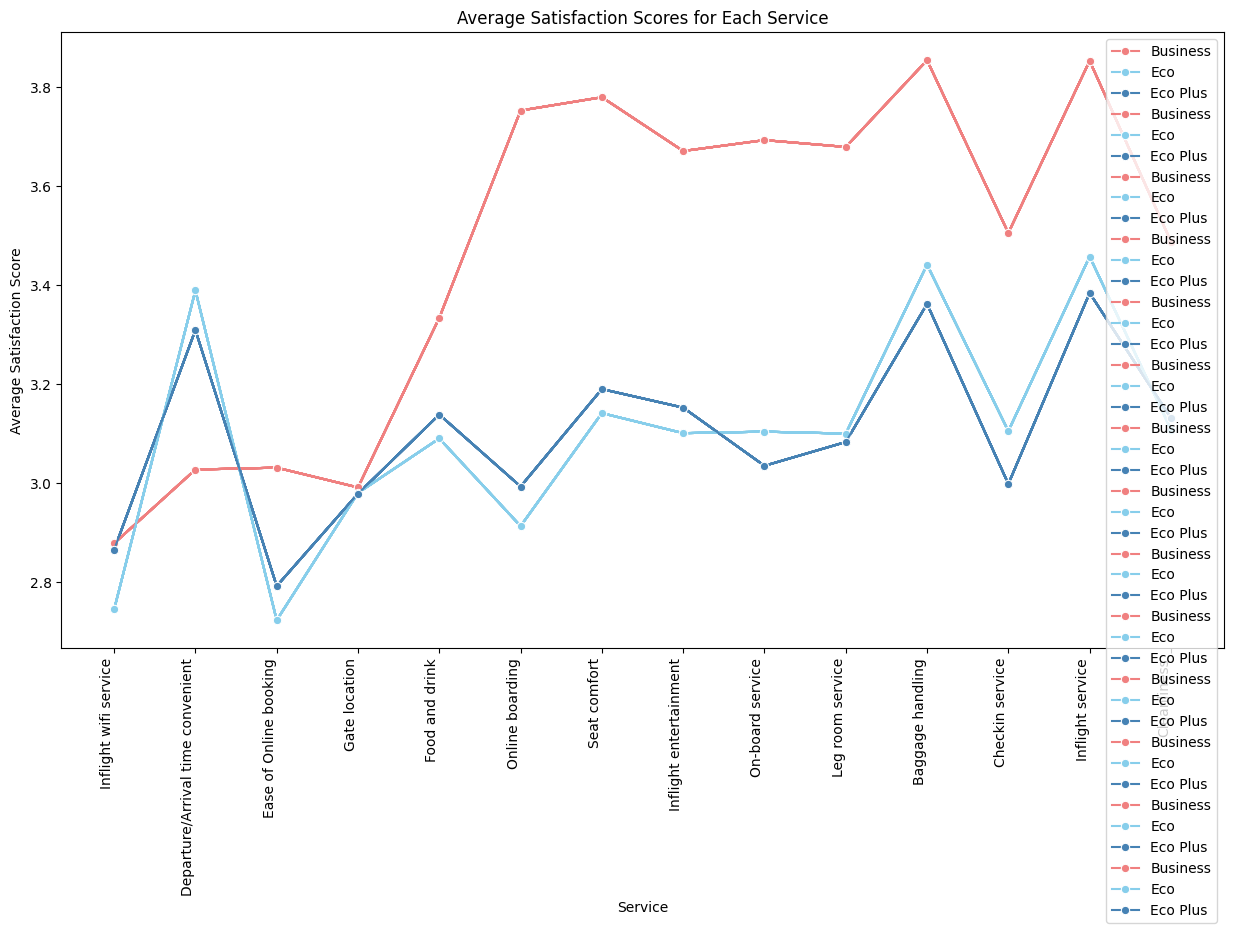

In [ ]:
business_class_satisfaction_mean = business_df[service_cols].mean()
economy_class_satisfaction_mean = eco_df[service_cols].mean()
economy_plus_class_satisfaction_mean = ecoplus_df[service_cols].mean()

# 꺾은선 그래프로 시각화
plt.figure(figsize=(15, 8))
for col in service_cols:
    sns.lineplot(data=business_class_satisfaction_mean, marker='o', label='Business', color='lightcoral')
    sns.lineplot(data=economy_class_satisfaction_mean, marker='o', label='Eco', color='skyblue')
    sns.lineplot(data=economy_plus_class_satisfaction_mean, marker='o', label='Eco Plus', color='steelblue')
plt.xticks(rotation=90, ha='right')
plt.title('Average Satisfaction Scores for Each Service')
plt.legend(loc='best')
plt.xlabel('Service')
plt.ylabel('Average Satisfaction Score')
plt.show()

### 상관관계 파악

In [ ]:
service_df = drop_df.copy()

In [ ]:
service_df = service_df.drop(columns = ['Unnamed: 0','id','Gender','Customer Type','Age','Type of Travel','Class','Flight Distance'])
service_df = service_df.drop(columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])

In [ ]:
service_df.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'satisfaction_binary', 'Flight_Distance_Category'],
      dtype='object')

In [ ]:
service_df

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction_binary,Flight_Distance_Category
0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,1,5
1,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,3
2,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,5,12
3,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,1,6
4,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0,1,2
103900,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0,5,24
103901,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,1,20
103902,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0,1,10


<ipython-input-40-29421a6658d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = service_df.corr()


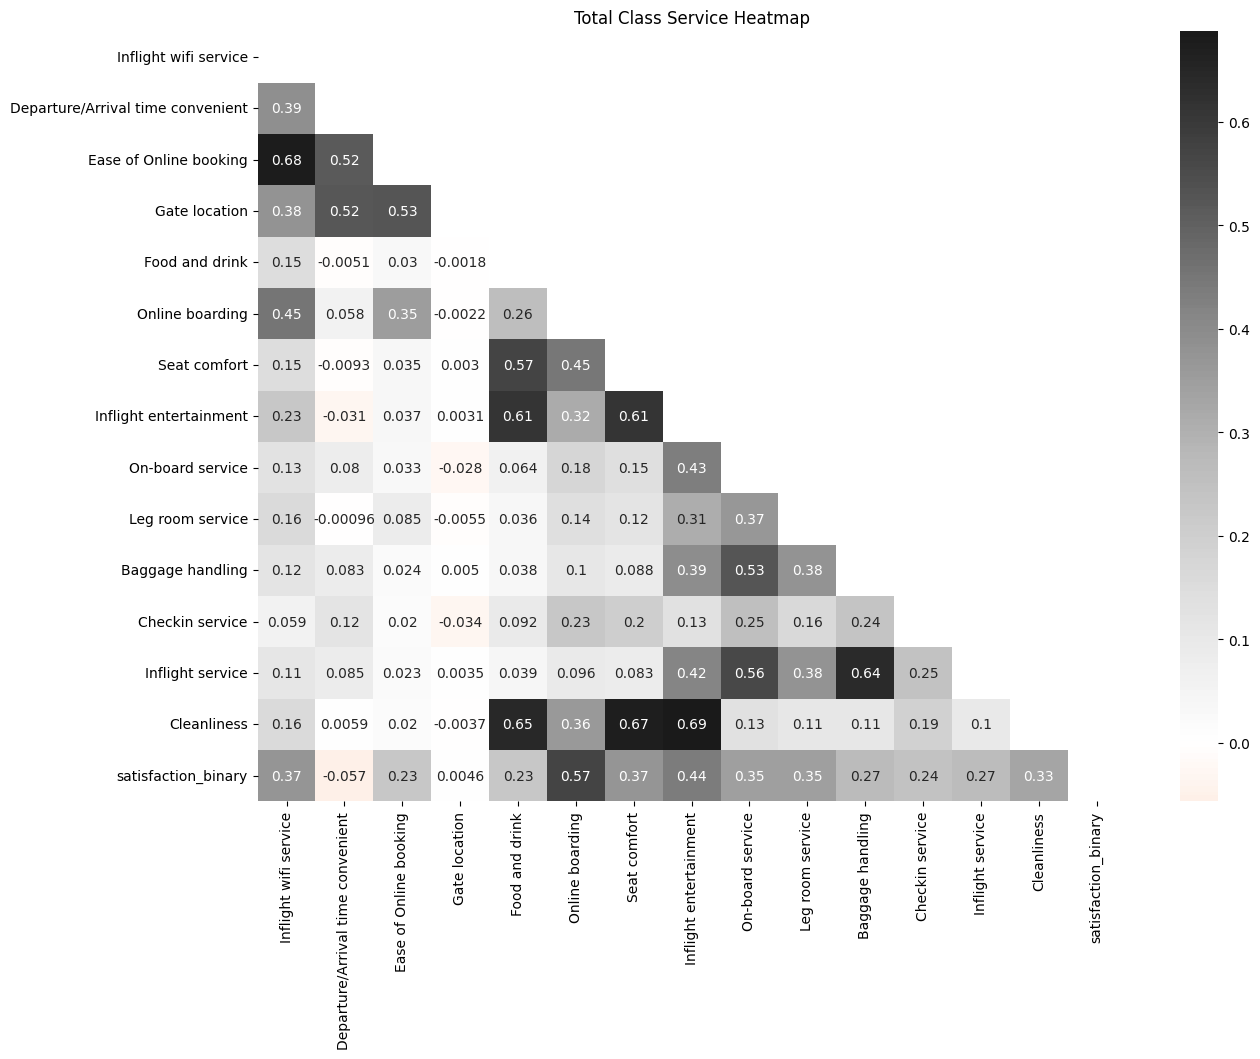

In [ ]:
# Calculate the correlation matrix
corr = service_df.corr()

# Set the lower triangle of the heatmap to be white
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdGy', center=0)
plt.title('Total Class Service Heatmap')
plt.show()


<ipython-input-41-8c9866f3c29e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_eco = eco_service_df.corr()


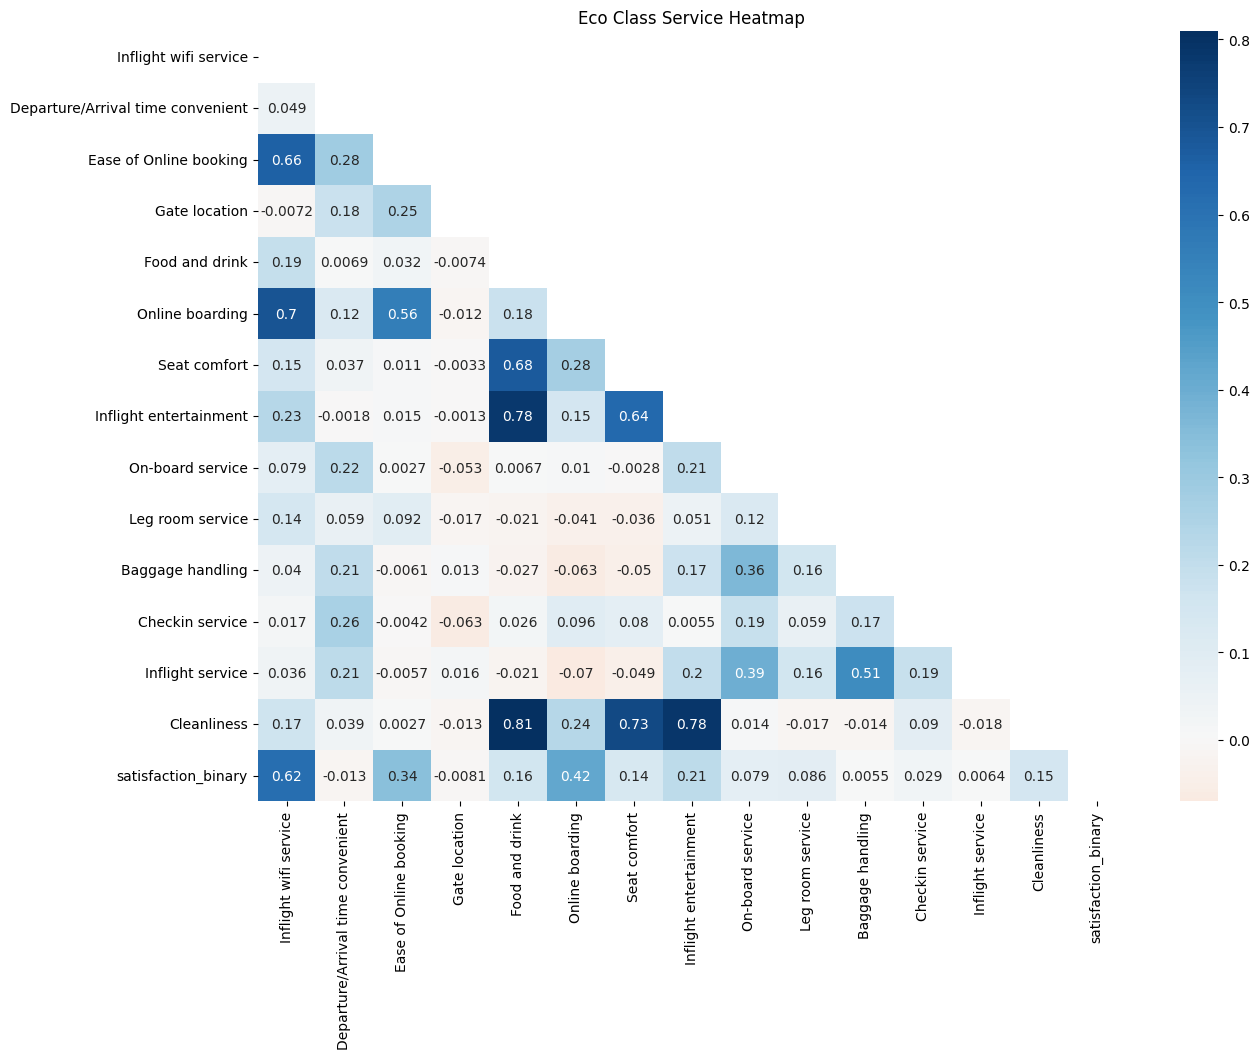

In [ ]:
eco_service_df = eco_df.drop(columns = ['Unnamed: 0','id','Gender','Customer Type','Age','Type of Travel','Class','Flight Distance',
                                            'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])

# Calculate the correlation matrix
corr_eco = eco_service_df.corr()

# Set the lower triangle of the heatmap to be white
mask = np.triu(np.ones_like(corr_eco, dtype=bool))

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_eco, mask=mask, annot=True, cmap='RdBu', center=0)
plt.title('Eco Class Service Heatmap')
plt.show()


<ipython-input-42-9e0bbda82701>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ecoplus = ecoplus_service_df.corr()


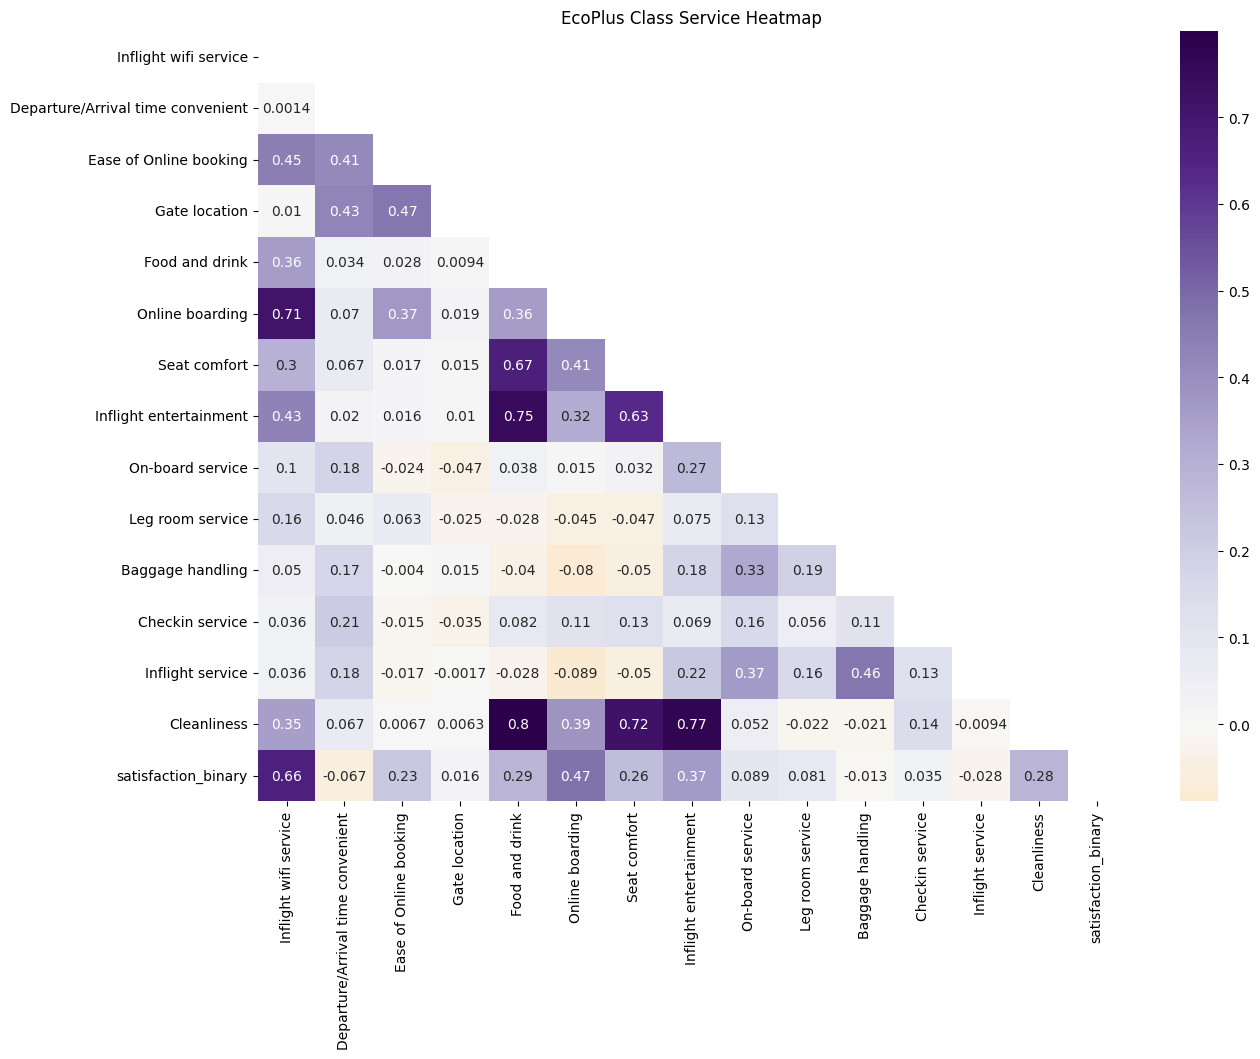

In [ ]:
ecoplus_service_df = ecoplus_df.drop(columns = ['Unnamed: 0','id','Gender','Customer Type','Age','Type of Travel','Class','Flight Distance',
                                            'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])

# Calculate the correlation matrix
corr_ecoplus = ecoplus_service_df.corr()

# Set the lower triangle of the heatmap to be white
mask = np.triu(np.ones_like(corr_ecoplus, dtype=bool))

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_ecoplus, mask=mask, annot=True, cmap='PuOr', center=0)
plt.title('EcoPlus Class Service Heatmap')
plt.show()

<ipython-input-43-77aad54970d5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_business = business_service_df.corr()


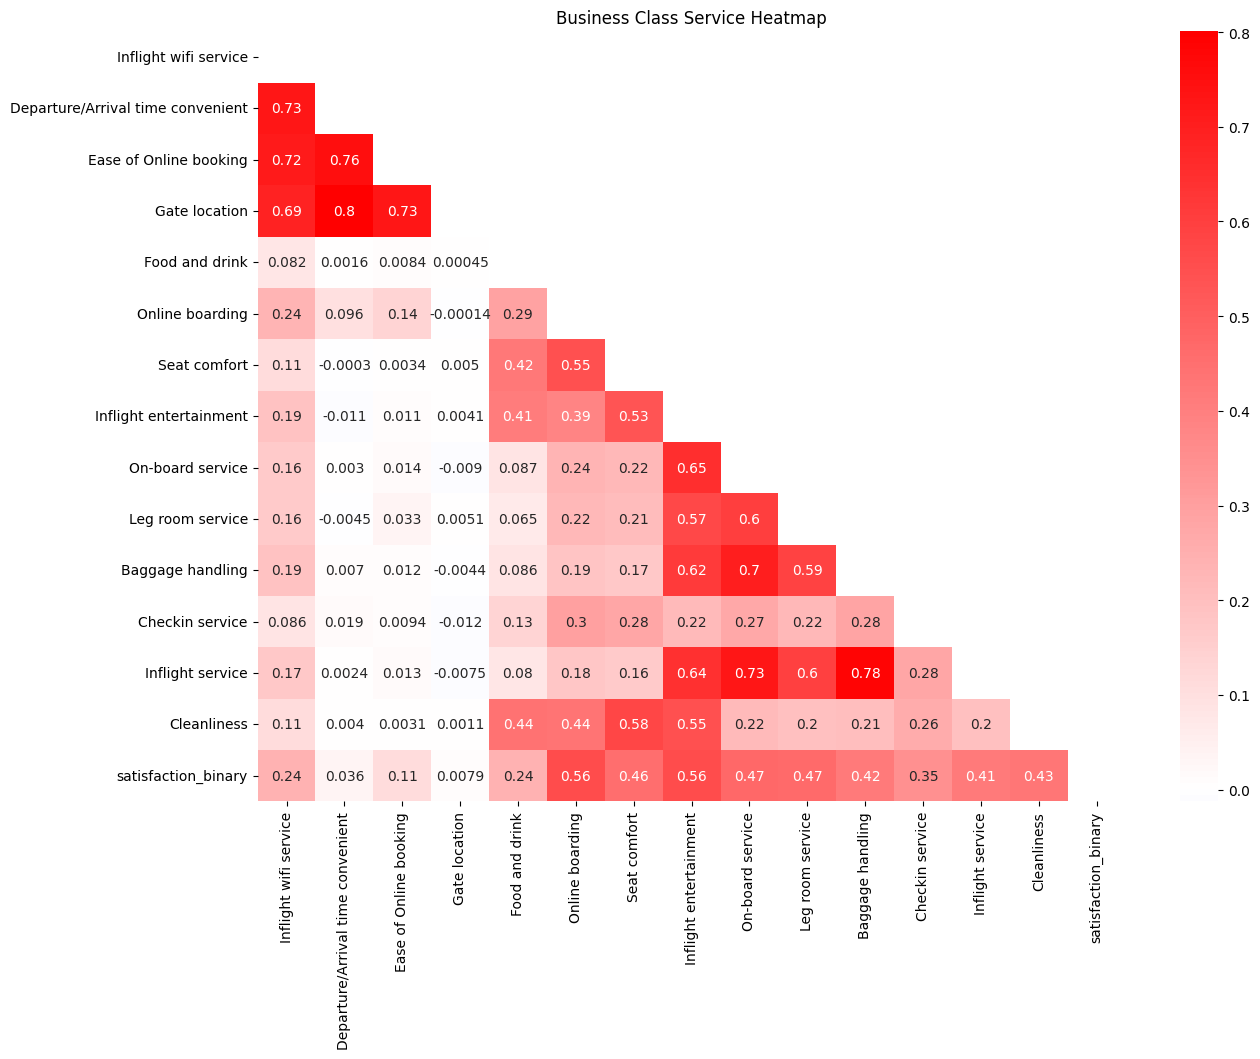

In [ ]:
business_service_df = business_df.drop(columns = ['Unnamed: 0','id','Gender','Customer Type','Age','Type of Travel','Class','Flight Distance',
                                            'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])

# Calculate the correlation matrix
corr_business = business_service_df.corr()

# Set the lower triangle of the heatmap to be white
mask = np.triu(np.ones_like(corr_business, dtype=bool))

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_business, mask=mask, annot=True, cmap='bwr', center=0)
plt.title('Business Class Service Heatmap')
plt.show()

<ipython-input-44-3aa24f6a1006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_eco_corr.values, y=sorted_eco_corr.index, palette="Blues_d")


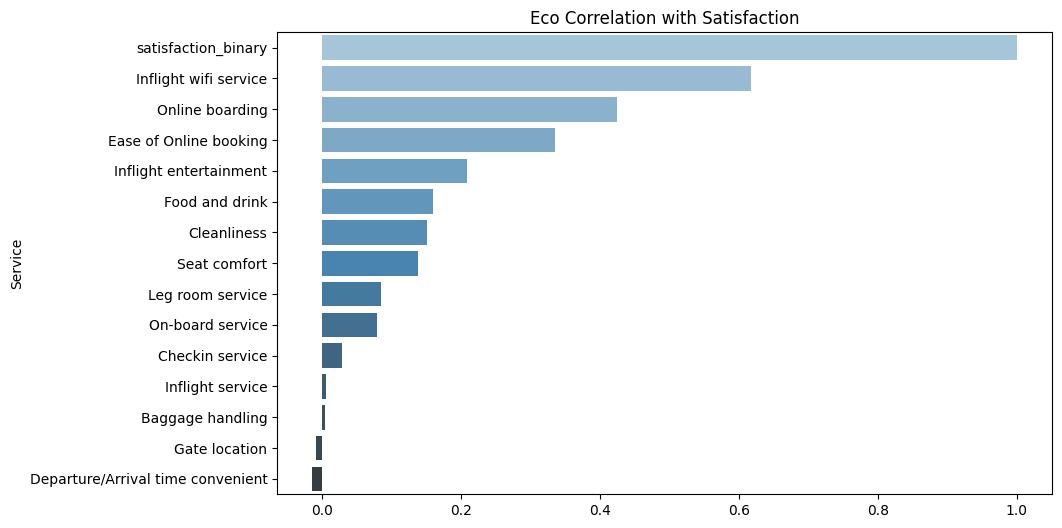

In [ ]:
eco_corr = corr_eco['satisfaction_binary']
sorted_eco_corr = eco_corr.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_eco_corr.values, y=sorted_eco_corr.index, palette="Blues_d")
plt.title('Eco Correlation with Satisfaction')
plt.ylabel('Service')
plt.show()


<ipython-input-45-25c2d4fa0c6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_ecoplus_corr.values, y=sorted_ecoplus_corr.index, palette="Purples_d")


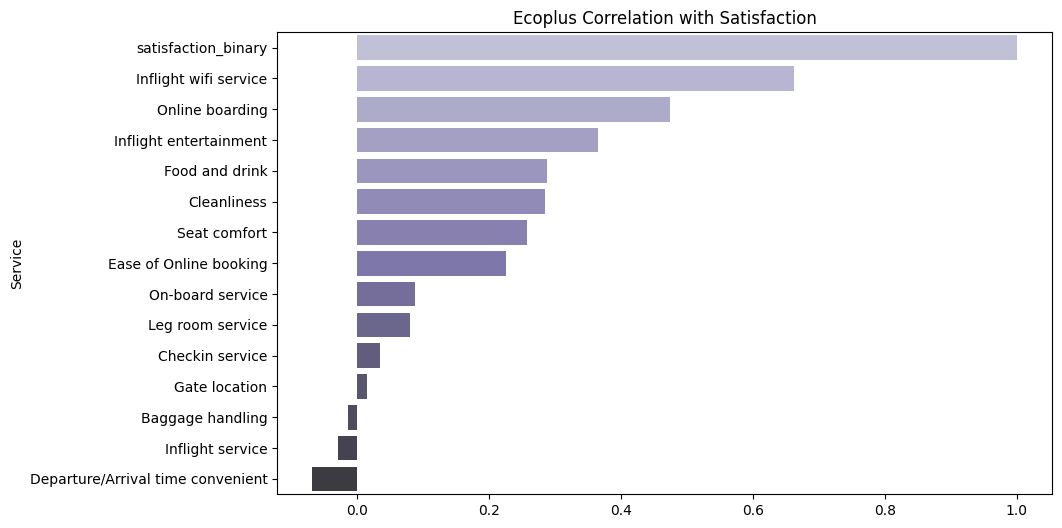

In [ ]:
ecoplus_corr = corr_ecoplus['satisfaction_binary']
sorted_ecoplus_corr = ecoplus_corr.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_ecoplus_corr.values, y=sorted_ecoplus_corr.index, palette="Purples_d")
plt.title('Ecoplus Correlation with Satisfaction')
plt.ylabel('Service')
plt.show()


<ipython-input-46-7b0f0f57f599>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_business_corr.values, y=sorted_business_corr.index, palette="Reds_d")


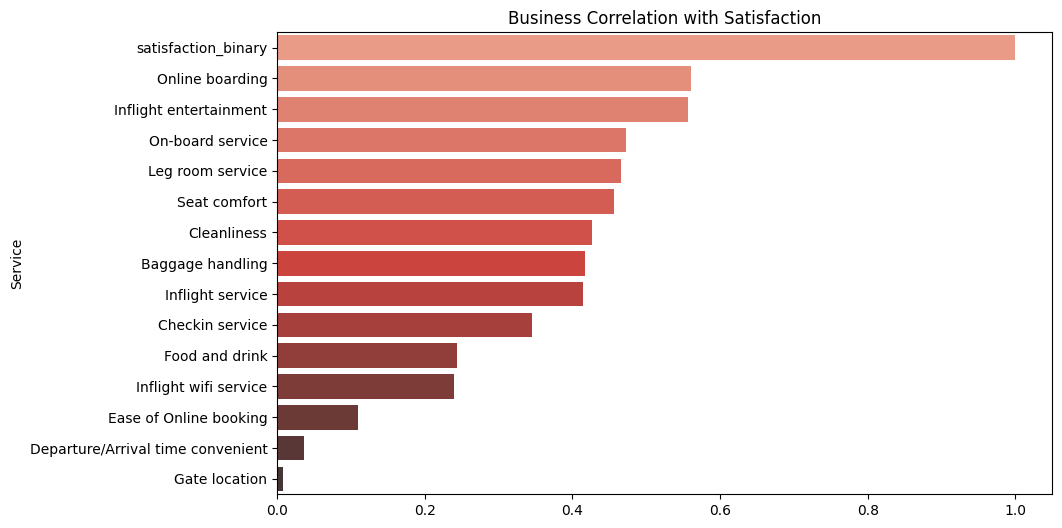

In [ ]:
business_corr = corr_business['satisfaction_binary']
sorted_business_corr = business_corr.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_business_corr.values, y=sorted_business_corr.index, palette="Reds_d")
plt.title('Business Correlation with Satisfaction')
plt.ylabel('Service')
plt.show()


# 5️⃣ 원인파악

### **상관관계와 점수평균 종합적고려**

상관관계 분석 결과와 점수 평균을 종합적으로 고려하여 불만족의 원인 파악 및 가설설정

#### 상관관계 분석결과 상위 3개

**Economy Class Corelation Ranks**

1. Inflight wifi service
2. Online boarding
3. Ease of Online booking



**EcoPlus Class Corelation Ranks**
1. Inflight wifi service
2. Online boarding
3. Inlight entertainment

**Business Class Corelation Ranks**

1. Online boarding
2. Inflight entertainment
3. On-board service
4. Leg room service
5. Seat comfort

#### 낮은 평가를 받은 세부서비스

ValueError: 'None' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

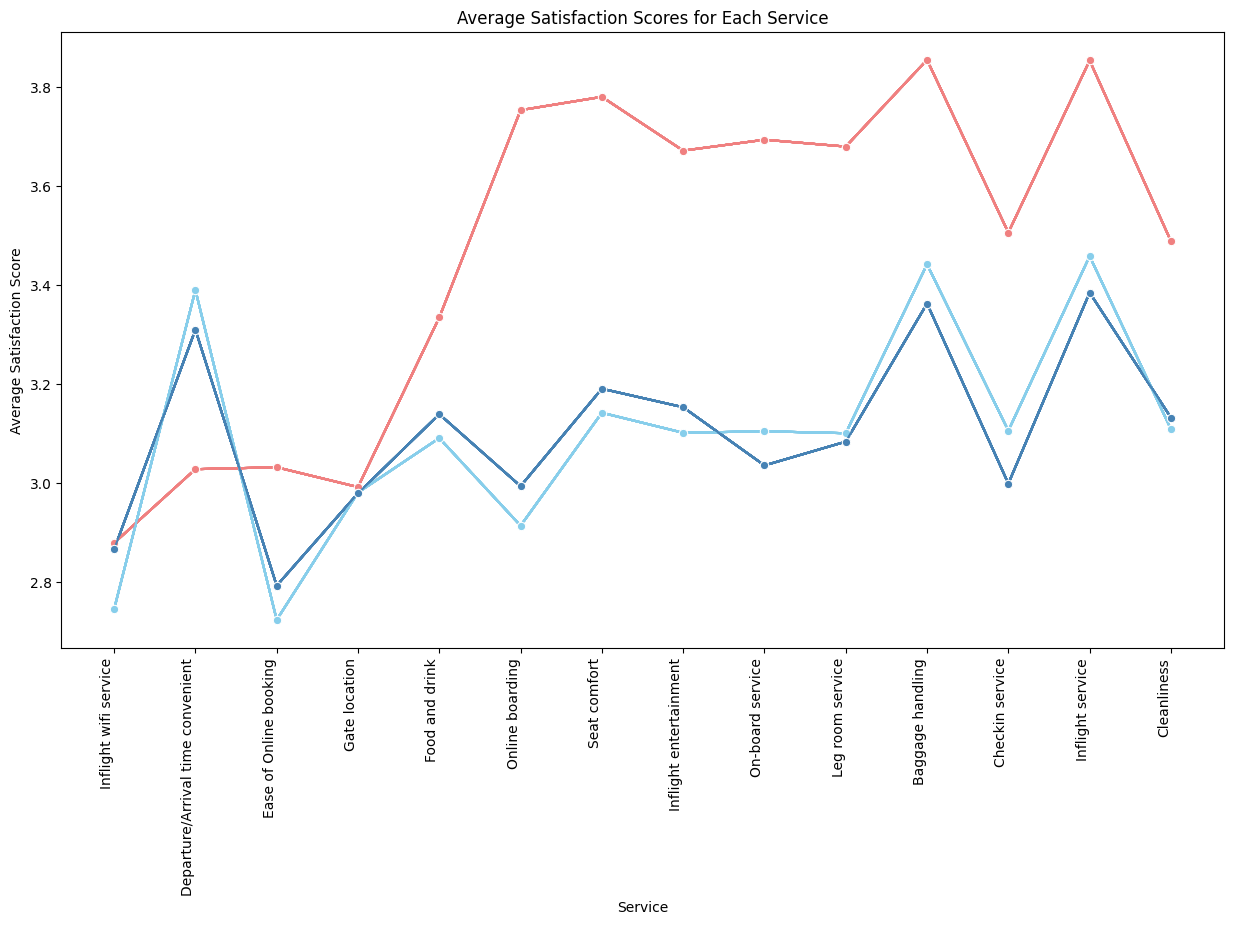

In [ ]:
plt.figure(figsize=(15, 8))
for col in service_cols:
    sns.lineplot(data=business_class_satisfaction_mean, marker='o', color='lightcoral')
    sns.lineplot(data=economy_class_satisfaction_mean, marker='o', color='skyblue')
    sns.lineplot(data=economy_plus_class_satisfaction_mean, marker='o', color='steelblue')
plt.xticks(rotation=90, ha='right')
plt.title('Average Satisfaction Scores for Each Service')
plt.xlabel('Service')
plt.ylabel('Average Satisfaction Score')
plt.legend(loc='None')# 범례 삭제
plt.show()


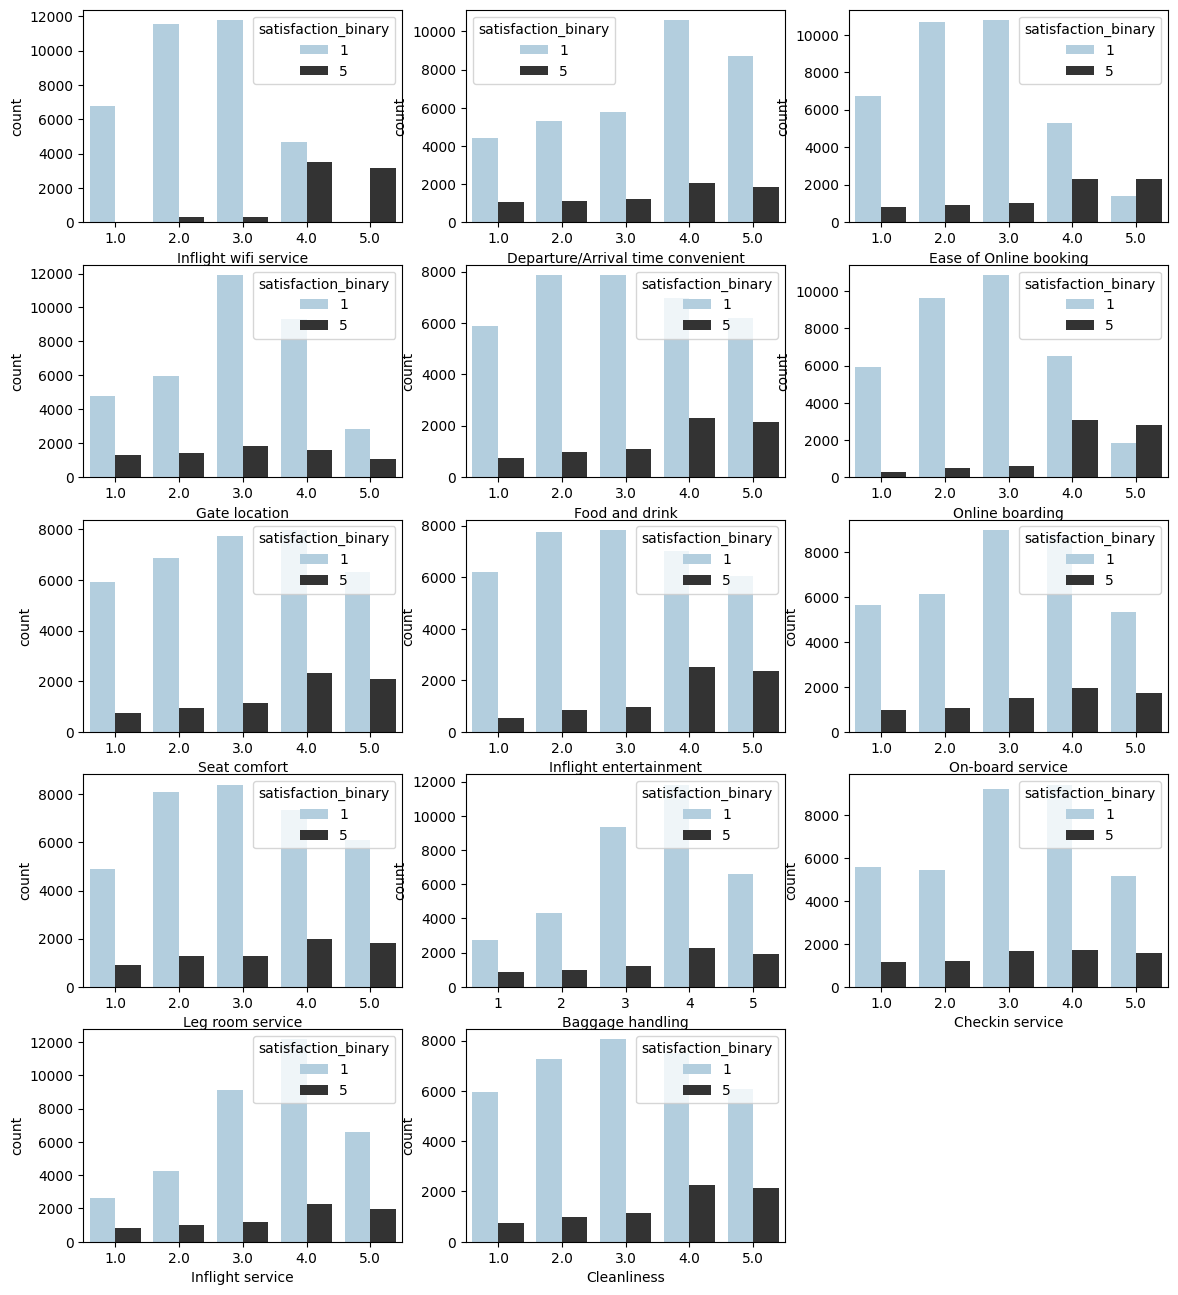

In [ ]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(5,3)
plt.figure(figsize=(14,16))

for idx, col in enumerate(service_cols):
    ax = plt.subplot(grid[idx])

    sns.countplot(x=col, hue="satisfaction_binary", data=eco_df, ax=ax, palette="Blues_d")

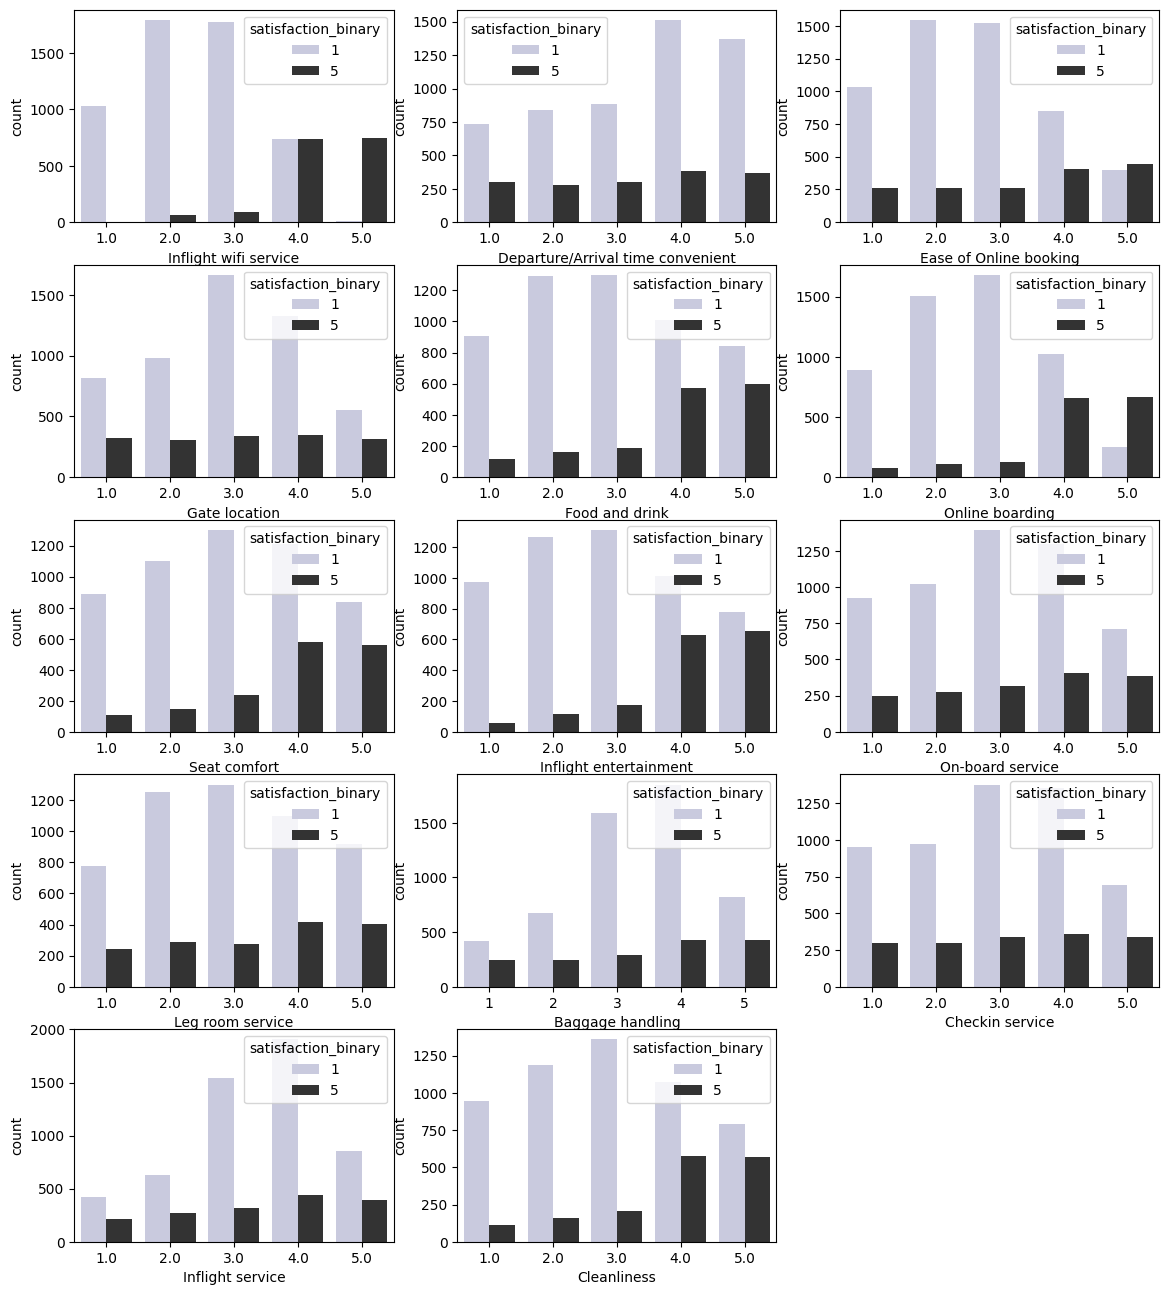

In [ ]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(5,3)
plt.figure(figsize=(14,16))

for idx, col in enumerate(service_cols):
    ax = plt.subplot(grid[idx])

    sns.countplot(x=col, hue="satisfaction_binary", data=ecoplus_df, ax=ax, palette="Purples_d")

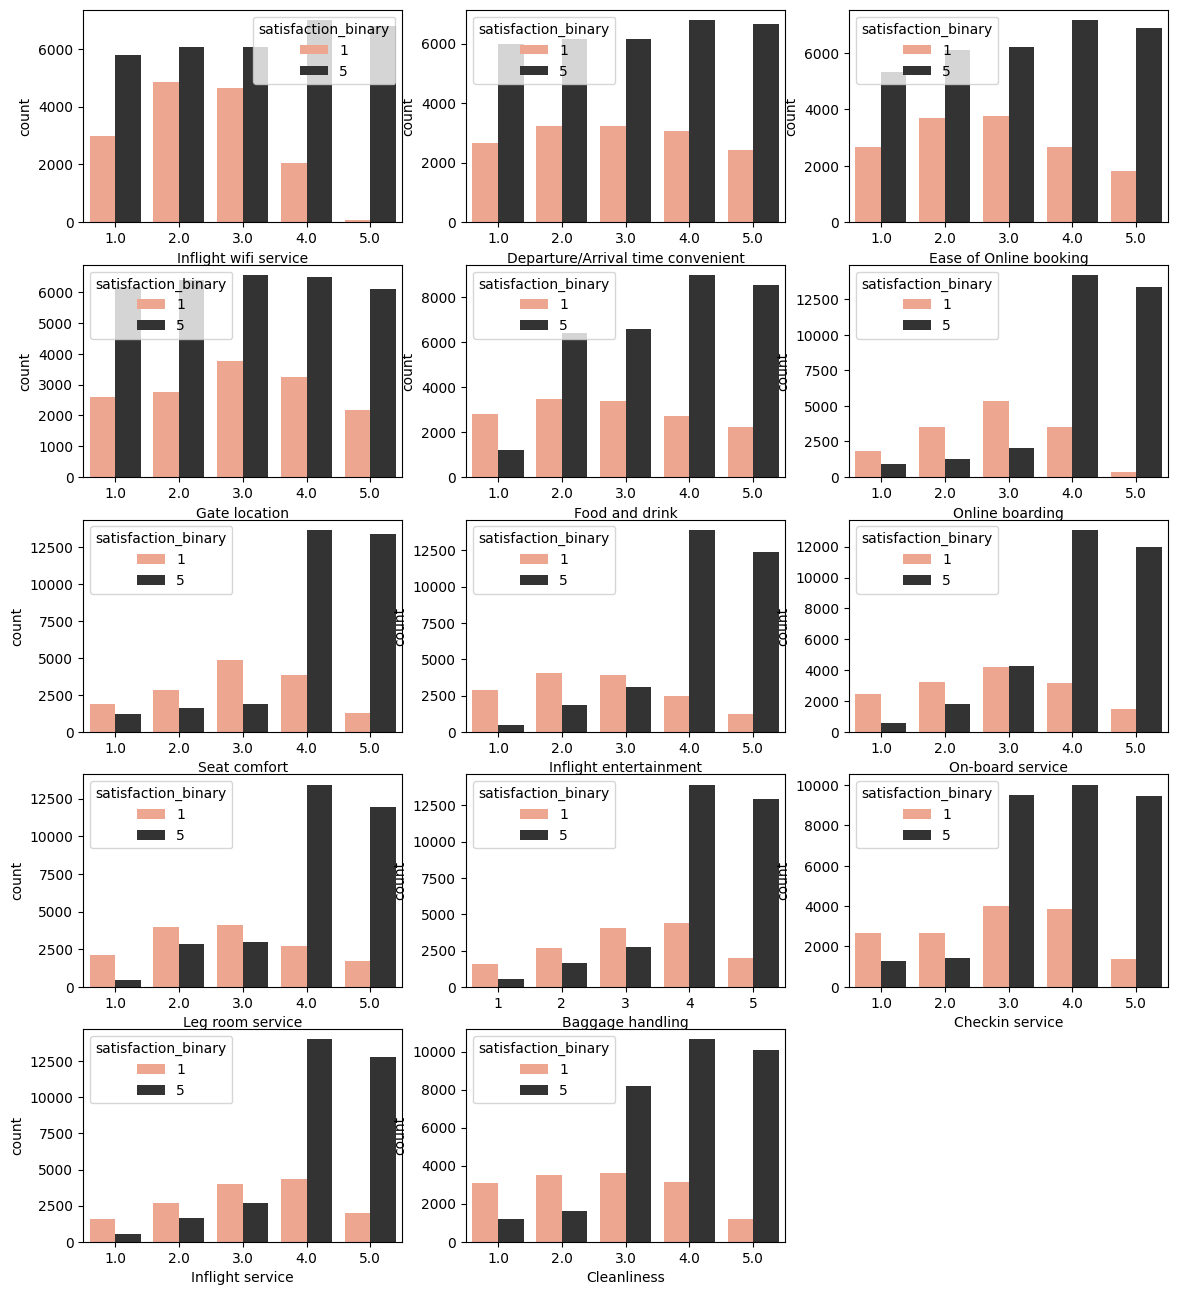

In [ ]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(5,3)
plt.figure(figsize=(14,16))

for idx, col in enumerate(service_cols):
    ax = plt.subplot(grid[idx])

    sns.countplot(x=col, hue="satisfaction_binary", data=business_df, ax=ax, palette="Reds_d")

### 가설검정

상관관계 분석결과 상위 3개의 서비스와 낮은 평가를 받은 세부서비스를 종합적으로 고려하여, 크게 2개의 가설을 설정하였다.

#### **가설1 - Economy Class**

**1. Economy Class 탑승객 중 dissatisfied 응답자는 다음 세가지에서 낮은 점수(1-3)를 주었을 것이다.**

1. Inflight wifi service
2. Online boarding
3. Ease of Online booking


t검정(Inflight wifi service)

In [ ]:
from scipy import stats

# dissatisfied 응답자의 Inflight wifi service만족도 점수
dissatisfied_scores = eco_df[eco_df["satisfaction_binary"] == 1]["Inflight wifi service"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")

T-statistic: 81.79451507297304
P-value: 0.0
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


카이제곱 검정 (inflight wifi service)

In [ ]:
from scipy.stats import chi2_contingency

# Inflight wifi service와 satisfaction_binary 사이의 교차 테이블 생성
cross_tab = pd.crosstab(eco_df["Inflight wifi service"] <= 3, eco_df["satisfaction_binary"])

# 카이제곱검정 시행
chi2, p_val, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print("카이제곱검정 결과 p-value:", p_val)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_val < alpha:
    print("귀무가설을 기각합니다. Dissatisfied 응답자는 Inflight wifi service 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. Dissatisfied 응답자는 Inflight wifi service 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단할 수 없습니다.")


카이제곱검정 결과 p-value: 0.0
귀무가설을 기각합니다. Dissatisfied 응답자는 Inflight wifi service 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.




---



t검정(online boarding)

In [ ]:
from scipy import stats

# dissatisfied 응답자의 Online boarding만족도 점수
dissatisfied_scores = eco_df[eco_df["satisfaction_binary"] == 1]["Online boarding"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Online boarding만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Online boarding만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")

T-statistic: 112.75278499131544
P-value: 0.0
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Online boarding만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


카이제곱검정(online boarding)

In [ ]:
from scipy.stats import chi2_contingency

# IOnline boarding와 satisfaction_binary 사이의 교차 테이블 생성
cross_tab = pd.crosstab(eco_df["Online boarding"] <= 3, eco_df["satisfaction_binary"])

# 카이제곱검정 시행
chi2, p_val, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print("카이제곱검정 결과 p-value:", p_val)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_val < alpha:
    print("귀무가설을 기각합니다. Dissatisfied 응답자는 Online boarding 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. Dissatisfied 응답자는 Online boarding 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단할 수 없습니다.")

카이제곱검정 결과 p-value: 0.0
귀무가설을 기각합니다. Dissatisfied 응답자는 Online boarding 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.




---



t검정 (ease of online booking)

In [ ]:
from scipy import stats

# dissatisfied 응답자의 Ease of Online booking만족도 점수
dissatisfied_scores = eco_df[eco_df["satisfaction_binary"] == 1]["Ease of Online booking"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Ease of Online booking만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Ease of Online booking만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")

T-statistic: 92.93479205767957
P-value: 0.0
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Ease of Online booking만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


카이제곱검정(ease of online booking)

In [ ]:
from scipy.stats import chi2_contingency

# Ease of Online booking와 satisfaction_binary 사이의 교차 테이블 생성
cross_tab = pd.crosstab(eco_df["Ease of Online booking"] <= 3, eco_df["satisfaction_binary"])

# 카이제곱검정 시행
chi2, p_val, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print("카이제곱검정 결과 p-value:", p_val)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_val < alpha:
    print("귀무가설을 기각합니다. Dissatisfied 응답자는Ease of Online booking 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. Dissatisfied 응답자는 Ease of Online booking만족도에서 낮은 점수(1-3)를 주었을 것으로 판단할 수 없습니다.")

카이제곱검정 결과 p-value: 0.0
귀무가설을 기각합니다. Dissatisfied 응답자는Ease of Online booking 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.


#### **가설2 - Economy Plus Class**

**2. Economy Plus 탑승객 중 dissatisfied 응답자는 다음 두가지에서 낮은 점수(1-3)를 주었을 것이다.**

1. Inflight wifi service
2. Online boarding

t검정 (inflight wifi service)

In [ ]:
from scipy import stats

# dissatisfied 응답자의 Inflight wifi service만족도 점수
dissatisfied_scores = ecoplus_df[ecoplus_df["satisfaction_binary"] == 1]["Inflight wifi service"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")

T-statistic: 32.02209001838508
P-value: 5.409280146611989e-206
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


카이제곱 검정 (inflight wifi service)

In [ ]:
from scipy.stats import chi2_contingency

# Ease of Online booking와 satisfaction_binary 사이의 교차 테이블 생성
cross_tab = pd.crosstab(ecoplus_df["Inflight wifi service"] <= 3, ecoplus_df["satisfaction_binary"])

# 카이제곱검정 시행
chi2, p_val, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print("카이제곱검정 결과 p-value:", p_val)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_val < alpha:
    print("귀무가설을 기각합니다. Dissatisfied 응답자는Inflight wifi service 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. Dissatisfied 응답자는Inflight wifi service 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단할 수 없습니다.")

카이제곱검정 결과 p-value: 0.0
귀무가설을 기각합니다. Dissatisfied 응답자는Inflight wifi service 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.




---



t검정 (online boarding)

In [ ]:
from scipy import stats

# dissatisfied 응답자의 Online boarding만족도 점수
dissatisfied_scores = ecoplus_df[ecoplus_df["satisfaction_binary"] == 1]["Online boarding"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Online boarding만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Online boarding만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")

T-statistic: 44.31558780881494
P-value: 0.0
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Online boarding만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


카이제곱 검정(online boarding)

In [ ]:
from scipy.stats import chi2_contingency

# Ease of Online booking와 satisfaction_binary 사이의 교차 테이블 생성
cross_tab = pd.crosstab(ecoplus_df["Online boarding"] <= 3, ecoplus_df["satisfaction_binary"])

# 카이제곱검정 시행
chi2, p_val, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print("카이제곱검정 결과 p-value:", p_val)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_val < alpha:
    print("귀무가설을 기각합니다. Dissatisfied 응답자는Online boarding 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. Dissatisfied 응답자는Online boarding 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단할 수 없습니다.")

카이제곱검정 결과 p-value: 0.0
귀무가설을 기각합니다. Dissatisfied 응답자는Online boarding 만족도에서 낮은 점수(1-3)를 주었을 것으로 판단됩니다.


#### (참고용) t검정 방법 두가지

In [ ]:
from scipy import stats

# dissatisfied 응답자의 Inflight wifi service만족도 점수
dissatisfied_scores = eco_df[eco_df["satisfaction_binary"] == 1]["Inflight wifi service"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")


T-statistic: 81.79451507297304
P-value: 0.0
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


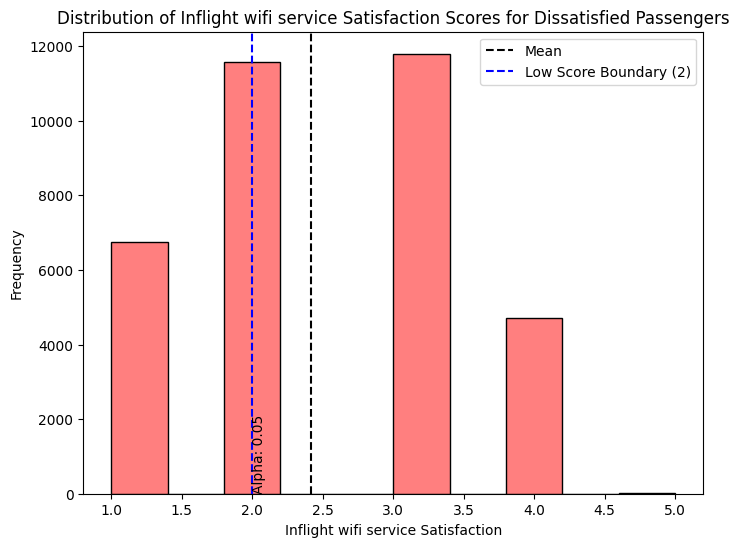

T-statistic: 81.79451507297304
P-value: 0.0
귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.


In [ ]:
# dissatisfied 응답자의 Inflight wifi service 만족도 점수
dissatisfied_scores = eco_df[eco_df["satisfaction_binary"] == 1]["Inflight wifi service"]

# t-검정 시행
t_statistic, p_value = stats.ttest_1samp(dissatisfied_scores, 2)  # 2는 낮은 점수 범위로 설정한 값입니다.

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(dissatisfied_scores, color='red', alpha=0.5, bins=10)

# 유의수준 표시
plt.axvline(x=np.mean(dissatisfied_scores), color='black', linestyle='--', label='Mean')
plt.axvline(x=2, color='blue', linestyle='--', label='Low Score Boundary (2)')
plt.text(2, 15, 'Alpha: {}'.format(alpha), rotation=90, verticalalignment='bottom')

plt.xlabel('Inflight wifi service Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight wifi service Satisfaction Scores for Dissatisfied Passengers')
plt.legend()
plt.show()

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("귀무가설을 기각합니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단됩니다.")
else:
    print("귀무가설을 기각하지 않습니다. 따라서, dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수를 주었을 것으로 판단할 수 없습니다.")

In [ ]:
from scipy.stats import ttest_ind

# t-검정 시행
t_statistic, p_value = ttest_ind(eco_df[eco_df['satisfaction_binary'] == 5]['Inflight wifi service'],
                                  eco_df[eco_df['satisfaction_binary'] == 1]['Inflight wifi service'])

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정 (보통 0.05로 설정)
alpha = 0.05

# p-value와 유의수준을 비교하여 가설을 기각할지 말지 결정
if p_value < alpha:
    print("결과: 귀무가설 기각 - dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수(1-3)를 준다는 가설을 지지하는 충분한 증거가 있습니다.")
else:
    print("결과: 귀무가설 채택 - dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수(1-3)를 준다는 가설을 지지하는 충분한 증거가 없습니다.")


t-statistic: 160.81589894811148
p-value: 0.0
결과: 귀무가설 기각 - dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수(1-3)를 준다는 가설을 지지하는 충분한 증거가 있습니다.


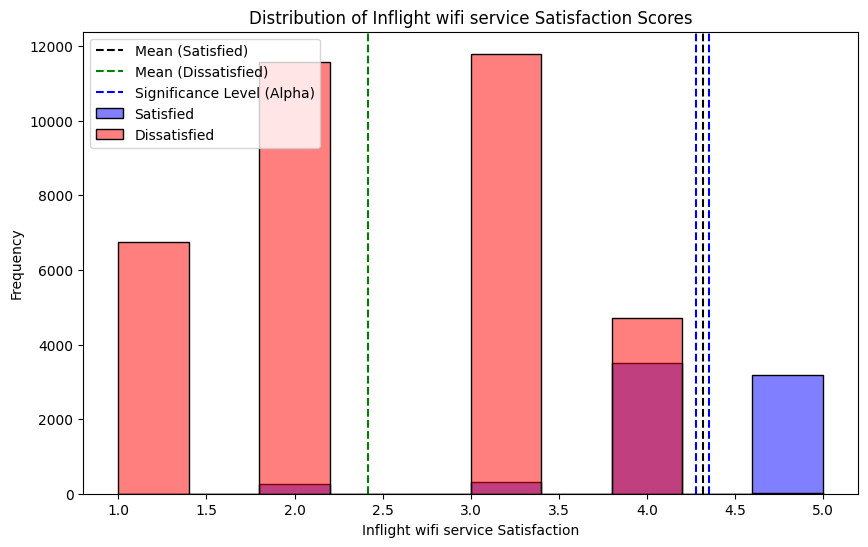

t-statistic: 160.81589894811148
p-value: 0.0
결과: 귀무가설 기각 - dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수(1-3)를 준다는 가설을 지지하는 충분한 증거가 있습니다.


In [ ]:
# 두 그룹의 데이터 추출
satisfied_group = eco_df[eco_df['satisfaction_binary'] == 5]['Inflight wifi service']
dissatisfied_group = eco_df[eco_df['satisfaction_binary'] == 1]['Inflight wifi service']

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(satisfied_group, color='blue', alpha=0.5, label='Satisfied', bins=10)
sns.histplot(dissatisfied_group, color='red', alpha=0.5, label='Dissatisfied', bins=10)

# 유의수준 표시
alpha = 0.05
plt.axvline(x=satisfied_group.mean(), color='black', linestyle='--', label='Mean (Satisfied)')
plt.axvline(x=dissatisfied_group.mean(), color='green', linestyle='--', label='Mean (Dissatisfied)')
plt.axvline(x=satisfied_group.mean() + (satisfied_group.std() * alpha), color='blue', linestyle='--', label='Significance Level (Alpha)')
plt.axvline(x=satisfied_group.mean() - (satisfied_group.std() * alpha), color='blue', linestyle='--')

plt.xlabel('Inflight wifi service Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight wifi service Satisfaction Scores')
plt.legend()
plt.show()

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준과 비교하여 결과 해석
if p_value < alpha:
    print("결과: 귀무가설 기각 - dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수(1-3)를 준다는 가설을 지지하는 충분한 증거가 있습니다.")
else:
    print("결과: 귀무가설 채택 - dissatisfied 응답자는 Inflight wifi service만족도에서 낮은 점수(1-3)를 준다는 가설을 지지하는 충분한 증거가 없습니다.")


# 6️⃣ 해결방안 제시

1. Inflight wifi service
2. Online boarding
3. Ease of Online booking

### **해결방안1**

전 좌석에서 WIFI 서비스 개선이 필요하다.

<ipython-input-35-73e2c303f0de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(grid[0])
<ipython-input-35-73e2c303f0de>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=service_cols[0], data=eco_df, ax=ax, palette="Blues")
<ipython-input-35-73e2c303f0de>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=service_cols[0], data=ecoplus_df, ax=ax, palette="Purples")
<ipython-input-35-73e2c303f0de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

<Axes: title={'center': 'Inflight Wifi Service'}, xlabel='Business', ylabel='count'>

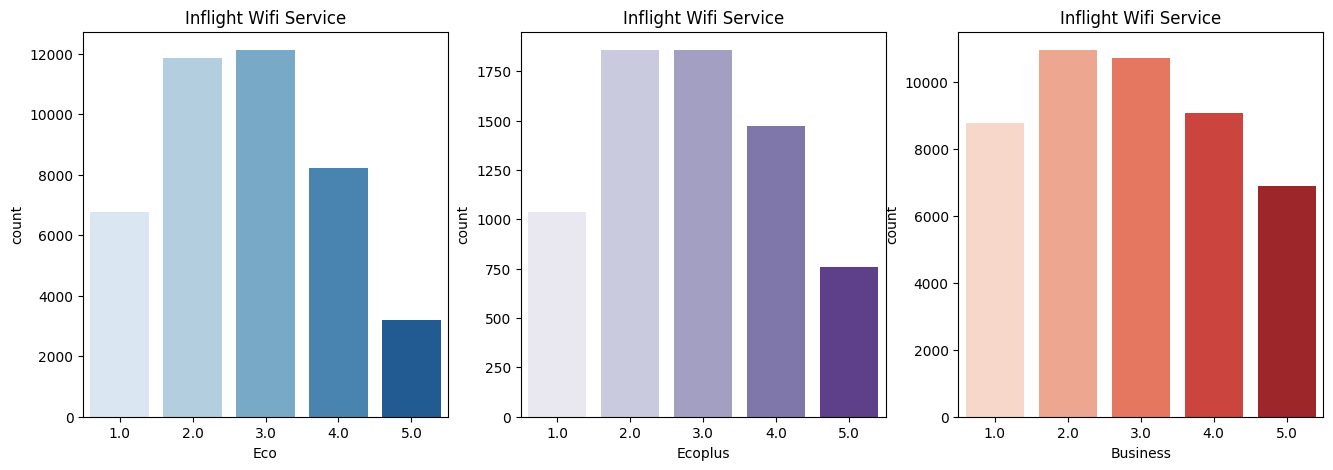

In [ ]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(1,3)
plt.figure(figsize=(16,5))
plt.title('Inflight Wifi Service')

ax = plt.subplot(grid[0])
plt.xlabel('Eco')
plt.title('Inflight Wifi Service')
sns.countplot(x=service_cols[0], data=eco_df, ax=ax, palette="Blues")
ax = plt.subplot(grid[1])
plt.xlabel('Ecoplus')
plt.title('Inflight Wifi Service')
sns.countplot(x=service_cols[0], data=ecoplus_df, ax=ax, palette="Purples")
ax = plt.subplot(grid[2])
plt.xlabel('Business')
plt.title('Inflight Wifi Service')
sns.countplot(x=service_cols[0], data=business_df, ax=ax, palette="Reds")

### **해결방안2**

Online boarding의 경우, 연령대가 올라갈 수록 점수가 높아졌으나, 50대부터 Ease of Online booking의 점수는 낮아졌다.

-> 따라서 50대 이상의 탑승객에게 온라인 부킹에 대한 좀더 자세한 설명이 필요하다.

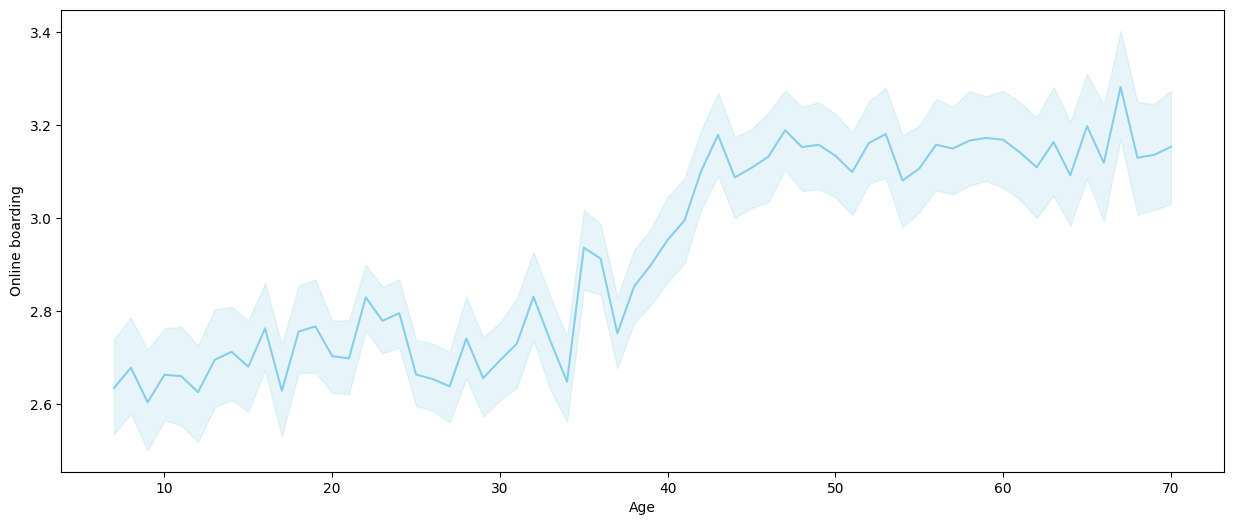

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x = 'Age', y='Online boarding', data = eco_df[eco_df['Age'] <= 70], color="skyblue")
#sns.lineplot(x = 'Age', y='Online boarding', data = ecoplus_df[ecoplus_df['Age'] <= 70], color="steelblue")
#sns.lineplot(x = 'Age', y='Online boarding', data = business_df[business_df['Age'] <= 70], color="lightcoral")
plt.show()

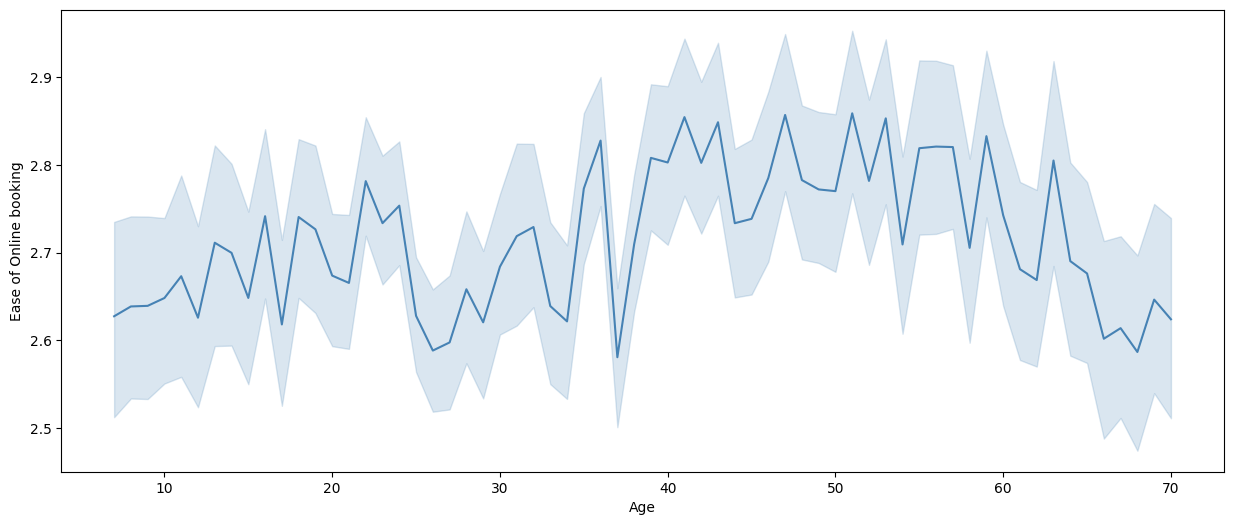

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x = 'Age', y='Ease of Online booking', data = eco_df[eco_df['Age'] <= 70], color="steelblue")
plt.show()

# ✅ (추가) 만족도 예측 모델링

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/DArt-B/5. 2024_1/train.csv')

test_df=pd.read_csv('/content/drive/MyDrive/DArt-B/5. 2024_1/test.csv')

all_data=[train_df,test_df]

data_names=['training data','testing data']

In [ ]:
for data in all_data:

    data.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [ ]:
filling_value=train_df['Arrival Delay in Minutes'].mean() #use mean to fill null values

for data in all_data:

    data['Arrival Delay in Minutes'].fillna(f'{filling_value:.1f}',inplace=True) #use mean with only one number after the point

In [ ]:
for data in all_data:

    data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].astype(float)

In [ ]:
for data,name in zip(all_data,data_names):

    print(f'There is {data.duplicated().sum()} duplicated data in {name}')


There is 0 duplicated data in training data
There is 0 duplicated data in testing data


------

In [ ]:
to_categorical=['Gender','Customer Type','Type of Travel','Class','satisfaction']

from sklearn.preprocessing import LabelEncoder

L_encoder=LabelEncoder()

for label in to_categorical:
    train_df[label]=L_encoder.fit_transform(train_df[label])
    test_df[label]=L_encoder.fit_transform(test_df[label])



In [ ]:
train_df["Age cat"]=pd.cut(train_df["Age"],4)
train_df["Flight Dis cat"]=pd.cut(train_df["Flight Distance"],5)
train_df["Departure Delay"]=pd.cut(train_df["Departure Delay in Minutes"],5)
train_df["Arrival Delay"]=pd.cut(train_df["Arrival Delay in Minutes"],4)



In [ ]:
train_df[["Age cat","satisfaction"]].groupby("Age cat",as_index=False).mean().sort_values(by="satisfaction",ascending=False).style.background_gradient(cmap='Blues')

,Age cat,satisfaction
2,"(46.0, 65.5]",0.529577
1,"(26.5, 46.0]",0.471743
0,"(6.922, 26.5]",0.284234
3,"(65.5, 85.0]",0.183724


In [ ]:
train_df[["Flight Dis cat","satisfaction"]].groupby("Flight Dis cat",as_index=False).mean().sort_values(by="satisfaction",ascending=False).style.background_gradient(cmap='Blues')

,Flight Dis cat,satisfaction
3,"(3002.2, 3992.6]",0.775289
4,"(3992.6, 4983.0]",0.709677
2,"(2011.8, 3002.2]",0.646339
1,"(1021.4, 2011.8]",0.468915
0,"(26.048, 1021.4]",0.329467


In [ ]:
train_df[["Departure Delay","satisfaction"]].groupby("Departure Delay",as_index=False).mean().sort_values(by="satisfaction",ascending=False).style.background_gradient(cmap='Blues')

,Departure Delay,satisfaction
3,"(955.2, 1273.6]",0.500000
4,"(1273.6, 1592.0]",0.500000
0,"(-1.592, 318.4]",0.433431
1,"(318.4, 636.8]",0.387978
2,"(636.8, 955.2]",0.250000


In [ ]:
train_df[["Arrival Delay","satisfaction"]].groupby("Arrival Delay",as_index=False).mean().sort_values(by="satisfaction",ascending=False).style.background_gradient(cmap='Blues')

,Arrival Delay,satisfaction
3,"(1188.0, 1584.0]",0.500000
0,"(-1.584, 396.0]",0.433385
2,"(792.0, 1188.0]",0.428571
1,"(396.0, 792.0]",0.365854


-------

In [ ]:
train_df.drop(['Age cat', 'Flight Dis cat', 'Departure Delay',
       'Arrival Delay'],axis=1,inplace=True)

In [ ]:
to_category=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

for col in to_category:

    train_df[col]=pd.cut(train_df[col],4,labels=[1,2,3,4])
    test_df[col]=pd.cut(test_df[col],4,labels=[1,2,3,4])

In [ ]:
for col in to_category:
    train_df[col]=train_df[col].astype(int)
    test_df[col]=test_df[col].astype(int)

--------

In [ ]:
# Training data splitting
x_train=train_df.drop(['satisfaction'],axis=1)
y_train=train_df['satisfaction']

# Testing data splitting
x_test=test_df.drop(['satisfaction'],axis=1)
y_test=test_df['satisfaction']

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.7 M

In [ ]:
from pycaret.classification import *
s=setup(train_df,target='satisfaction')

,Description,Value
0,Session id,4669
1,Target,satisfaction
2,Target type,Binary
3,Original data shape,"(103904, 23)"
4,Transformed data shape,"(103904, 23)"
5,Transformed train set shape,"(72732, 23)"
6,Transformed test set shape,"(31172, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


🔘 **model 1: XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

XGB=XGBClassifier()
XGB.fit(x_train,y_train)

print("XGB Classifier training score :",XGB.score(x_train,y_train))
print("XGB Classifier testing score :",XGB.score(x_test,y_test))

XGB_test_score =  round(XGB.score(x_test, y_test) * 100, 2)




XGB Classifier training score : 0.9709635817677856
XGB Classifier testing score : 0.9637742531567601


In [ ]:
XGB_prediction=XGB.predict(x_test)

-------

**🔘 model 2: logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(x_train,y_train)

print("logistic regression training score :",LR.score(x_train,y_train))
print("logistic regression testing score :",LR.score(x_test,y_test))

LR_test_score =  round(LR.score(x_test, y_test) * 100, 2)



logistic regression training score : 0.8750866184170003
logistic regression testing score : 0.870495842315984


In [ ]:
LR_prediction=LR.predict(x_test)


-----

**🔘 model 3: Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC.fit(x_train,y_train)

print("Gradient Boosting Classifier training score :",GBC.score(x_train,y_train))
print("Gradient Boosting Classifier testing score :",GBC.score(x_test,y_test))

GBC_test_score = round(GBC.score(x_test, y_test) * 100, 2)

Gradient Boosting Classifier training score : 0.9414267015706806
Gradient Boosting Classifier testing score : 0.9420234062211272


In [ ]:

GBC_prediction=GBC.predict(x_test)


-----

**🔘 model 4: support vector machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

print("svc training score :",svc.score(x_train,y_train))
print("svc testing score :",svc.score(x_test,y_test))

svc_test_score =  round(svc.score(x_test, y_test) * 100, 2)

svc training score : 0.9480674468740375
svc testing score : 0.9474514936864799


In [ ]:

svc_prediction=svc.predict(x_test)

------------

**🔘 model 5: Cat Boost Classifier**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

CBC=CatBoostClassifier()

CBC.fit(x_train,y_train)



Learning rate set to 0.074823
0:	learn: 0.5936311	total: 238ms	remaining: 3m 57s
1:	learn: 0.4956086	total: 452ms	remaining: 3m 45s
2:	learn: 0.4383630	total: 596ms	remaining: 3m 18s
3:	learn: 0.3899771	total: 745ms	remaining: 3m 5s
4:	learn: 0.3553702	total: 894ms	remaining: 2m 57s
5:	learn: 0.3251352	total: 1.04s	remaining: 2m 52s
6:	learn: 0.3029365	total: 1.15s	remaining: 2m 43s
7:	learn: 0.2832906	total: 1.24s	remaining: 2m 33s
8:	learn: 0.2610528	total: 1.39s	remaining: 2m 33s
9:	learn: 0.2404413	total: 1.55s	remaining: 2m 33s
10:	learn: 0.2289825	total: 1.68s	remaining: 2m 31s
11:	learn: 0.2200628	total: 1.76s	remaining: 2m 24s
12:	learn: 0.2087985	total: 1.82s	remaining: 2m 18s
13:	learn: 0.2022164	total: 1.89s	remaining: 2m 12s
14:	learn: 0.1964070	total: 1.98s	remaining: 2m 9s
15:	learn: 0.1895481	total: 2.04s	remaining: 2m 5s
16:	learn: 0.1851194	total: 2.12s	remaining: 2m 2s
17:	learn: 0.1821384	total: 2.19s	remaining: 1m 59s
18:	learn: 0.1784866	total: 2.26s	remaining: 1m 

In [ ]:
print("CBC Classifier training score :",CBC.score(x_train,y_train))
print("CBC Classifier testing score :",CBC.score(x_test,y_test))

CBC_test_score =  round(CBC.score(x_test, y_test) * 100, 2)

CBC_prediction =CBC.predict(x_test)

CBC Classifier training score : 0.9727055743763474
CBC Classifier testing score : 0.9641592238989837


----------

**🔘 model 6 : K Neighbors Classifier**

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

print("KNN training score :",KNN.score(x_train,y_train))
print("KNN testing score :",KNN.score(x_test,y_test))

KNN_test_score = round(KNN.score(x_test, y_test) * 100, 2)



KNN training score : 0.9513685709886048
KNN testing score : 0.931706190329535


In [ ]:
KNN_predict=KNN.predict(x_test)

--------

**🔘 Models test scores**

In [ ]:
models = pd.DataFrame({
    'Model': ['XGB Classifier', 'logistic regression', 'Gradient Boosting Classifier',
              'svc','CatBoostClassifier','KNN'
              ],
    'Score': [XGB_test_score,  LR_test_score,GBC_test_score ,
              svc_test_score, CBC_test_score,KNN_test_score
              ]})

models.sort_values(by='Score', ascending=False).style.background_gradient(cmap='Blues')

,Model,Score
4,CatBoostClassifier,96.420000
0,XGB Classifier,96.380000
3,svc,94.750000
2,Gradient Boosting Classifier,94.200000
5,KNN,93.170000
1,logistic regression,87.050000


###모델 평가


In [ ]:
from sklearn.metrics import f1_score

for n,model in enumerate(models_predictions) :

    score=f1_score(y_test,model)

    print(f'F1 score for {label[n]} is {score:.3f}')




F1 score for XGB Classifier is 0.958
F1 score for logistic regression is 0.849
F1 score for Gradient Boosting Classifier is 0.933
F1 score for svc is 0.939
F1 score for CatBoostClassifier is 0.959
F1 score for KNN is 0.920


CatBoostClassifier의 F1 Score가 가장 높다.

F1 Score는 0.0 ~ 1.0 사이의 값을 가지며 높을수록 좋다.